In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter, OrderedDict



# Data Preparation

In [34]:
daftar_abusive = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/abusive.csv')['ABUSIVE'].tolist()
new_kamusalay = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/new_kamusalay.csv', encoding= 'ISO-8859-1', header=None)

data = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/data.csv', encoding= 'ISO-8859-1')


In [35]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [36]:
data.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [37]:
data.shape

(13169, 13)

In [38]:
data.duplicated().sum()

125

In [39]:
data = data.drop_duplicates()

In [40]:
data.duplicated().sum()

0

In [41]:
data.shape

(13044, 13)

In [42]:
data.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
data.isna().sum()/data.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [13]:
daftar_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [14]:
daftar_abusive = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/abusive.csv')['ABUSIVE'].tolist()
daftar_abusive

['alay',
 'ampas',
 'buta',
 'keparat',
 'anjing',
 'anjir',
 'babi',
 'bacot',
 'bajingan',
 'banci',
 'bandot',
 'buaya',
 'bangkai',
 'bangsat',
 'bego',
 'bejat',
 'bencong',
 'berak',
 'bisu',
 'celeng',
 'jancuk',
 'bodoh',
 'berengsek',
 'budek',
 'burik',
 'jamban',
 'cocot',
 'congor',
 'culun',
 'cupu',
 'dongok',
 'dungu',
 'edan',
 'tai',
 'ngewe',
 'geblek',
 'gembel',
 'gila',
 'goblok',
 'iblis',
 'idiot',
 'jablay',
 'jembud',
 'jembut',
 'jijik',
 'kacrut',
 'kafir',
 'modar',
 'kampang',
 'kampret',
 'kampungan',
 'kimak',
 'kontol',
 'kunti',
 'tuyul',
 'kunyuk',
 'mampus',
 'memek',
 'monyet',
 'najis',
 'nete',
 'ngentot',
 'noob',
 'pecun',
 'perek',
 'sampah',
 'sarap',
 'setan',
 'silit',
 'bokong',
 'sinting',
 'sompret',
 'sontoloyo',
 'terkutuk',
 'titit',
 'pantat',
 'tolol',
 'udik',
 'antek',
 'asing',
 'ateis',
 'sitip',
 'autis',
 'picek',
 'ayam kampus',
 'bani kotak',
 'bispak',
 'bisyar',
 'bokep',
 'bong',
 'cacat',
 'cct',
 'cebong',
 'taplak',
 'cu

In [15]:
new_kamusalay = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/new_kamusalay.csv', encoding= 'ISO-8859-1', header=None)
new_kamusalay

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [17]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


# Preprocess

In [18]:
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

new_kamusalay_convert = dict(zip(new_kamusalay[0], new_kamusalay[1]))

def normalize_alay(text):
    return ' '.join([new_kamusalay_convert[x] if x in new_kamusalay_convert else x for x in text.split(' ')])

In [19]:
def preprocess(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    text = normalize_alay(text)
    return text

In [20]:
data['Tweet'] = data['Tweet'].apply(preprocess)
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0


# Statistika Deskriptif

In [21]:
data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

In [22]:
tweets_slicing = []

for tweet in data['Tweet'].str.split():
    for word in tweet:
        if len(word) > 0 and word in daftar_abusive:
            tweets_slicing.append(word)

In [23]:
tweets_slicing

['bego',
 'edan',
 'sarap',
 'sipit',
 'cebong',
 'kafir',
 'dungu',
 'bani',
 'taplak',
 'kampret',
 'ngewe',
 'bacot',
 'banci',
 'jablay',
 'pecun',
 'onta',
 'kafir',
 'ampas',
 'monyet',
 'banci',
 'anjing',
 'noob',
 'setan',
 'komunis',
 'cebong',
 'antek',
 'asing',
 'nete',
 'sipit',
 'homo',
 'ngentot',
 'gay',
 'gembel',
 'bangsat',
 'bajingan',
 'edan',
 'kafir',
 'bejat',
 'hina',
 'anjir',
 'bego',
 'bodoh',
 'gila',
 'kampret',
 'dungu',
 'dungu',
 'cebong',
 'nete',
 'bani',
 'iblis',
 'banci',
 'homo',
 'kafir',
 'bisu',
 'setan',
 'ateis',
 'bangsat',
 'bajingan',
 'homo',
 'cocot',
 'asing',
 'bangkai',
 'komunis',
 'komunis',
 'ngentot',
 'babi',
 'asing',
 'asing',
 'asing',
 'rezim',
 'asing',
 'sipit',
 'kampang',
 'onta',
 'cebong',
 'najis',
 'transgender',
 'anjing',
 'titit',
 'bacot',
 'kafir',
 'bodoh',
 'iblis',
 'goblok',
 'bani',
 'cebong',
 'cebong',
 'rezim',
 'antek',
 'asing',
 'asing',
 'asing',
 'asing',
 'asing',
 'pecun',
 'cacat',
 'pantat',
 'b

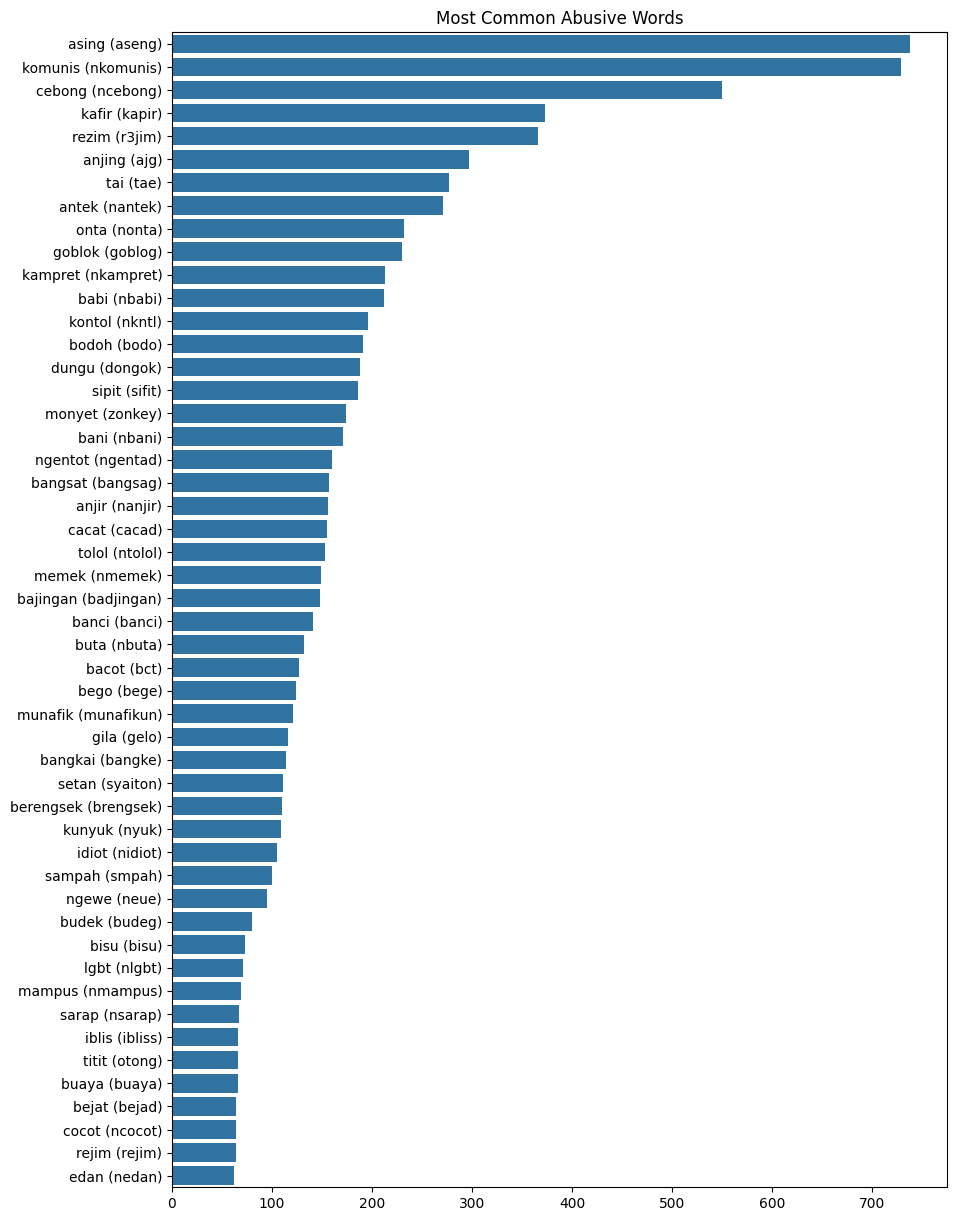

In [24]:
tweets_counter = Counter(tweets_slicing).most_common()

top_tweets = OrderedDict(tweets_counter)

show_only = 50
    
keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

original_slang = []
for word in keys:
    if word in new_kamusalay[1].values:
        original_slang.append(new_kamusalay.loc[new_kamusalay[1] == word, 0].values[0])
    else:
        original_slang.append(word)
        
combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

plt.figure(figsize=(10, 15))
sns.barplot(x=vals[:show_only], y=combined_words[:show_only])
plt.title('Most Common Abusive Words')
plt.show()

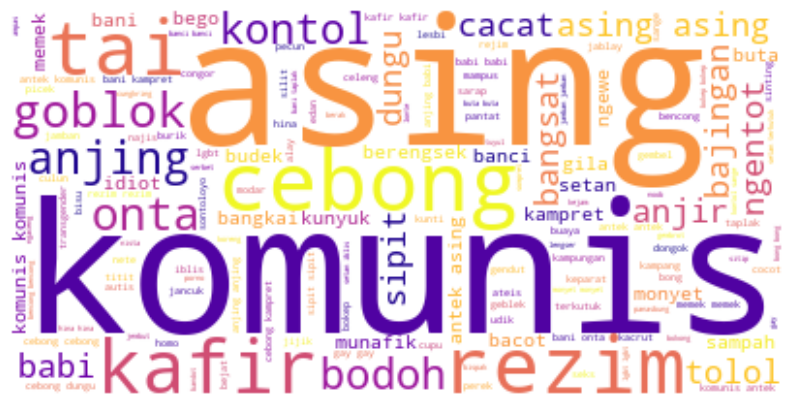

In [25]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 8))
tokens_ = ' '.join(tweets_slicing)
wc_ = WordCloud(background_color='white', max_font_size=100, colormap='plasma').generate(tokens_)
axes.axis("off")
axes.imshow(wc_, interpolation="bilinear")
plt.show()

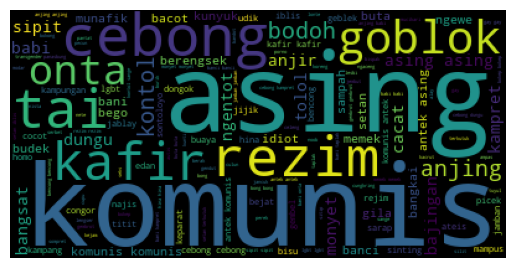

In [26]:
text = ' '.join(tweets_slicing)
wc = WordCloud().generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

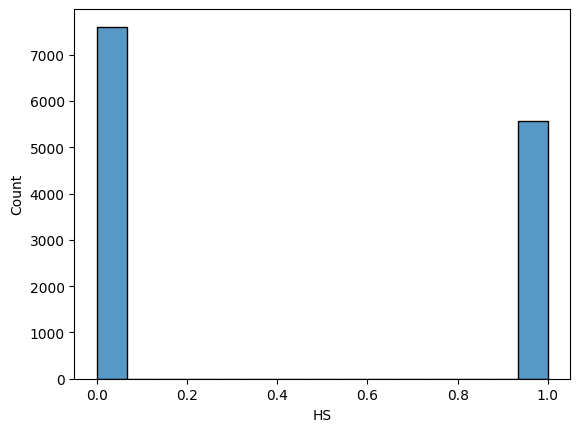

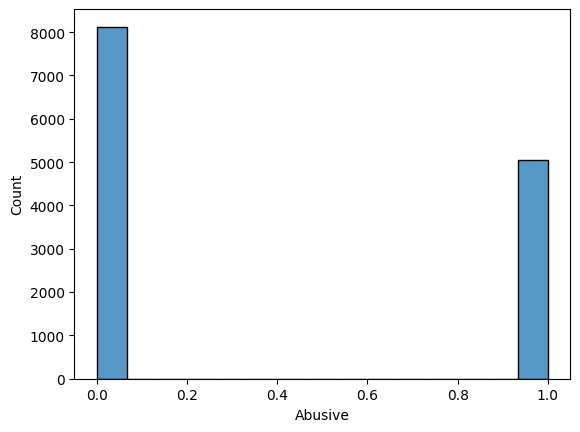

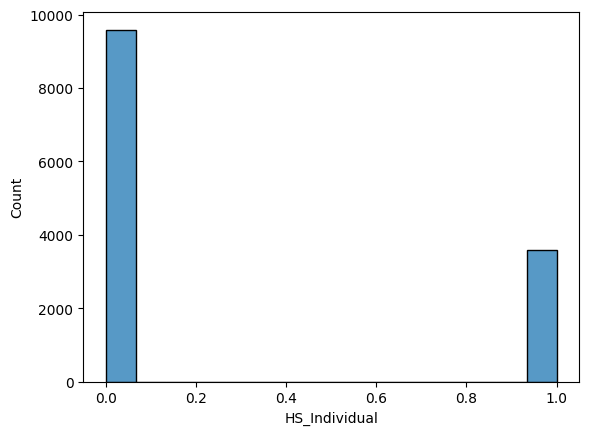

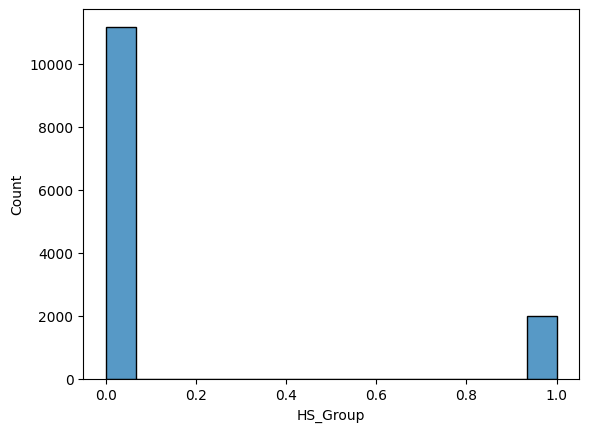

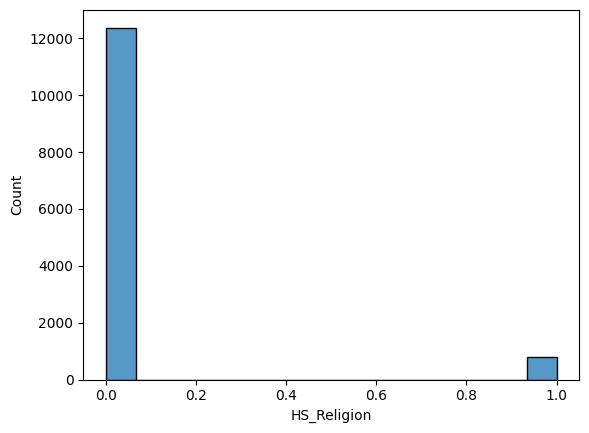

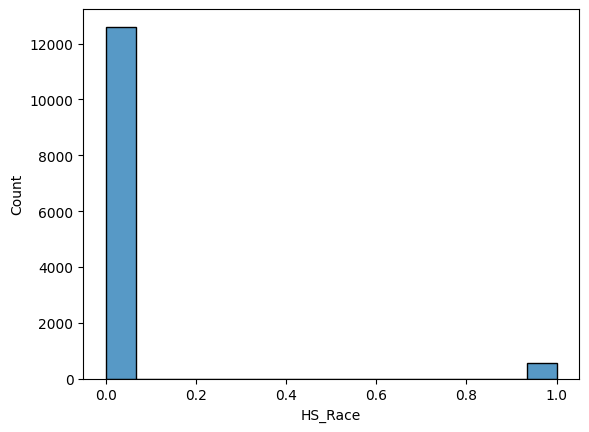

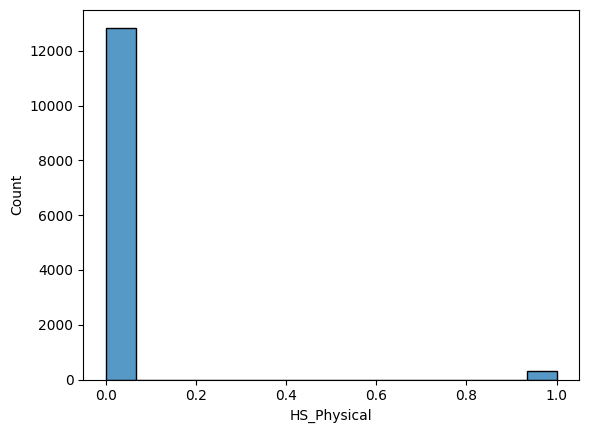

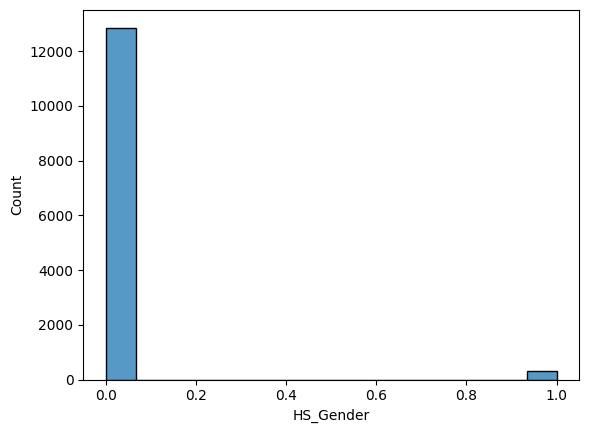

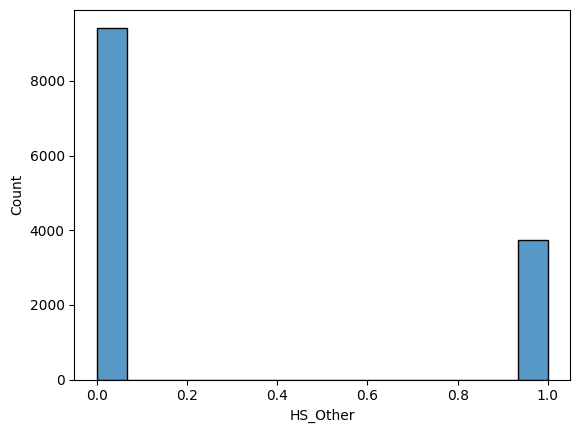

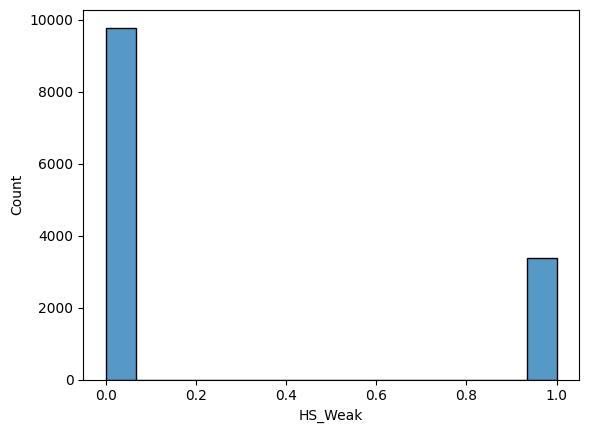

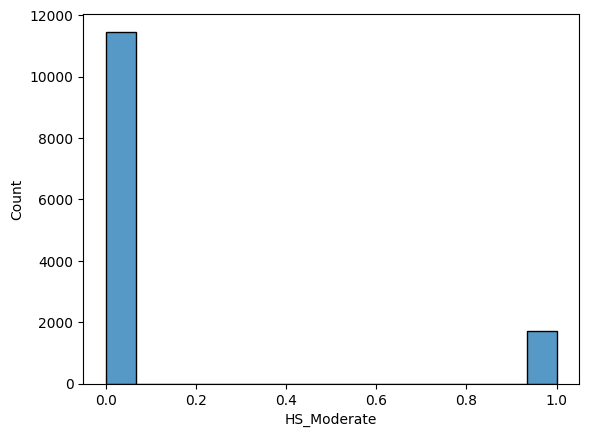

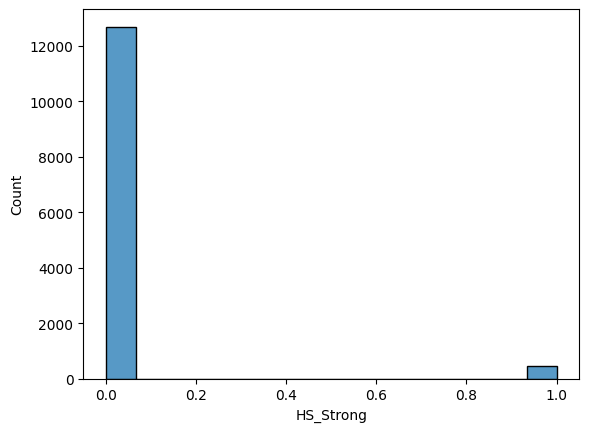

In [27]:
df1 = data.drop(['Tweet'], axis=1)
for i in df1.columns:
    j = 1
    plt.figure(j)
    sns.histplot(data=df1, x=i)
    plt.show()
    j = j+1

In [28]:
df2 = df1.sum()
df2

HS               5561
Abusive          5043
HS_Individual    3575
HS_Group         1986
HS_Religion       793
HS_Race           566
HS_Physical       323
HS_Gender         306
HS_Other         3740
HS_Weak          3383
HS_Moderate      1705
HS_Strong         473
dtype: int64

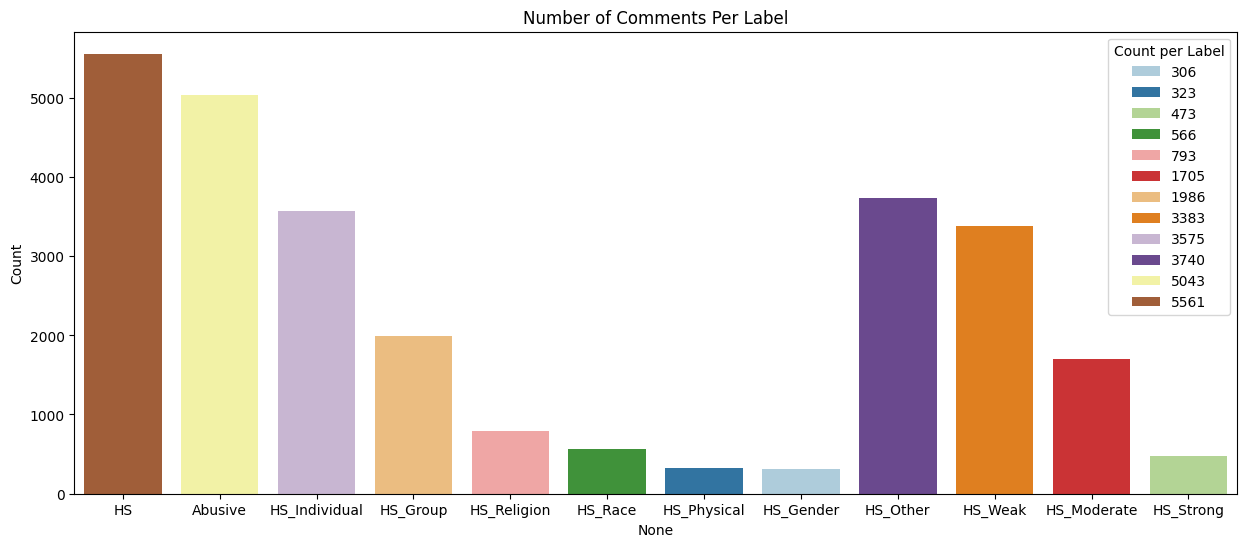

In [29]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df2.index, y=df2.values, hue=df2.values, dodge=False, palette='Paired')
plt.ylabel('Count')
plt.title("Number of Comments Per Label")
leg = plt.legend(title='Count per Label', bbox_to_anchor=(1,1))